In [40]:
## Packages to include
import matplotlib.pyplot as plt
import numpy as np
import math

In [49]:
## BLS12_381 data
logq = 381 ## bit size of the base field order
logp = 255 ## bit size of the elliptic curve group order
k = 8 ## number of chunks in the Exponential ElGamal construction
n = 4096 ## max degree of the polynomial in Danksharding
s = [i for i in range(1,n)] ## number of opened points during the protocol
logN = 3072 ## This provides 128-bit security
paillierPackingParam = math.floor(logN/logp)
expElgamalBandwidth = (logq*k)*np.array(s)+7*logq ## first term is the ciphertexts and the second term is the proofs
paillierBandwidth = (2*logN+512+2*logN)*np.array(s)+(381+256) ##The terms in order: ciphertexts, z_i, W_i, Cq, c
paillierCiphertexts = [math.floor(i) for i in np.array(s)/12]
packedPaillierBandwidth = np.array(paillierCiphertexts)*(381+4*logN)+np.array(s)*(3*logq+logq)

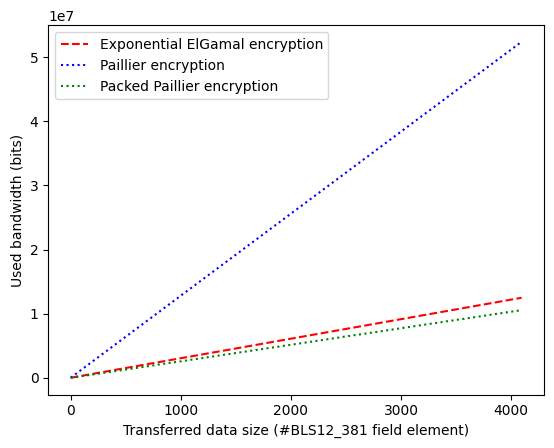

In [50]:
plt.plot(s,expElgamalBandwidth,linestyle = 'dashed',color='red', label="Exponential ElGamal encryption")
plt.plot(s,paillierBandwidth, linestyle = 'dotted', color='blue',label="Paillier encryption")
plt.plot(s,packedPaillierBandwidth, linestyle = 'dotted', color='green',label="Packed Paillier encryption")
plt.legend()
plt.xlabel("Transferred data size (#BLS12_381 field element)")
plt.ylabel("Used bandwidth (bits)")
plt.show()

In [ ]:
## Should we also put here the proof sizes of the multi-client model?